# División de los datos en grupo para entrenamiento, prueba y validación

In [32]:
import pandas as pd 
import numpy as np 

df = pd.read_excel("Datos IRIS.xlsx", index_col=None, header=None)

# División de dataset

df_T = df.iloc[0:35] # Datos de Entrenamiento
df_T = df_T.append(df.iloc[50:85])
df_T = df_T.append(df.iloc[100:135])

print("Entrenamiento \n", df_T)


df_P = df.iloc[35:45]          #Datos de prueba
df_P = df_P.append(df.iloc[85:95])
df_P = df_P.append(df.iloc[135:145])

print("Prueba \n", df_P)

df_R = df.iloc[45:50]          #Datos de validación
df_R = df_R.append(df.iloc[95:100])
df_R = df_R.append(df.iloc[145:150])

print("Resultantes \n", df_R)



Entrenamiento 
        0    1    2    3               4  5
0    5.1  3.5  1.4  0.2     Iris-setosa  1
1    4.9  3.0  1.4  0.2     Iris-setosa  1
2    4.7  3.2  1.3  0.2     Iris-setosa  1
3    4.6  3.1  1.5  0.2     Iris-setosa  1
4    5.0  3.6  1.4  0.2     Iris-setosa  1
..   ...  ...  ...  ...             ... ..
130  7.4  2.8  6.1  1.9  Iris-virginica  3
131  7.9  3.8  6.4  2.0  Iris-virginica  3
132  6.4  2.8  5.6  2.2  Iris-virginica  3
133  6.3  2.8  5.1  1.5  Iris-virginica  3
134  6.1  2.6  5.6  1.4  Iris-virginica  3

[105 rows x 6 columns]
Prueba 
        0    1    2    3                4  5
35   5.0  3.2  1.2  0.2      Iris-setosa  1
36   5.5  3.5  1.3  0.2      Iris-setosa  1
37   4.9  3.1  1.5  0.1      Iris-setosa  1
38   4.4  3.0  1.3  0.2      Iris-setosa  1
39   5.1  3.4  1.5  0.2      Iris-setosa  1
40   5.0  3.5  1.3  0.3      Iris-setosa  1
41   4.5  2.3  1.3  0.3      Iris-setosa  1
42   4.4  3.2  1.3  0.2      Iris-setosa  1
43   5.0  3.5  1.6  0.6      Iris-setos

# Normalización de los conjutos de datos

In [33]:
#Mínimos y máximos
def minimo(dfin):
    min_0 = dfin[0].min()  #Columna 0
    min_1 = dfin[1].min()  #Columna 1
    min_2 = dfin[2].min()  #Columna 2
    min_3 = dfin[3].min()  #Columna 3

    return [min_0, min_1, min_2, min_3]

def maximo(dfin):
    max_0 = dfin[0].max()  #Columna 0
    max_1 = dfin[1].max()  #Columna 1
    max_2 = dfin[2].max()  #Columna 2
    max_3 = dfin[3].max()  #Columna 3

    return [max_0, max_1, max_2, max_3]

# Normalización por columna
def minmax_norm(dfin , min, max):
    return (dfin - min) / (max - min)

# Normalización del dataframe
def norm_df(dfin, min = [0,0,0,0], max = [0,0,0,0]):

    # Normalización de Dataframe de entrenamiento
    df_norm_0 = minmax_norm(dfin[0], min[0], max[0])  #Columna 0
    df_norm_1 = minmax_norm(dfin[1], min[1], max[1])  #Columna 1
    df_norm_2 = minmax_norm(dfin[2], min[2], max[2])  #Columna 2
    df_norm_3 = minmax_norm(dfin[3], min[3], max[3])  #Columna 3

    return pd.DataFrame([df_norm_0,df_norm_1, df_norm_2, df_norm_3, dfin[5]] ).transpose()  # Dataframe con las columnas normalizadas

#Mínimos y máximos para cada Dataframe
global_min = minimo(df_T)    # Mínimo global de los datos
global_max = maximo(df_T)    # Máximo global de los datos

minimo_P = minimo(df_P)
maximo_P = maximo(df_P)

minimo_R = minimo(df_R)
maximo_R = maximo(df_R)

#Actualización de mínimo y máximo global en caso de que sea necesario
for i in range(len(minimo_P)):
    if minimo_P[i] < global_min[i]:
        global_min[i] = minimo_P[i]
    if maximo_P[i] > global_max[i]:
        global_max[i] = maximo_P[i]

for i in range(len(minimo_R)):
    if minimo_R[i] < global_min[i]:
        global_min[i] = minimo_R[i]
    if maximo_R[i] > global_max[i]:
        global_max[i] = maximo_R[i]

print(global_min, global_max)

#Normalización Dataframe de entrenamiento
df_TN = norm_df(df_T, global_min, global_max) 
print("Entrenamiento Normalizado \n", df_TN)

#Normalización Dataframe de prueba
df_PN = norm_df(df_P, global_min, global_max)
print("Prueba Normalizado \n",df_PN)

# Normalización de Dataframe de validación
df_norm_0 = minmax_norm(df_R[0], global_min[0], global_max[0])  #Columna 0
df_norm_1 = minmax_norm(df_R[1], global_min[1], global_max[1])  #Columna 1
df_norm_2 = minmax_norm(df_R[2], global_min[2], global_max[2])  #Columna 2
df_norm_3 = minmax_norm(df_R[3], global_min[3], global_max[3])  #Columna 3

df_RN = pd.DataFrame([df_norm_0,df_norm_1, df_norm_2, df_norm_3]).transpose()  # Dataframe con las columnas normalizadas

print("Validación Normalizado \n",df_RN)

[4.3, 2.0, 1.0, 0.1] [7.9, 4.4, 6.9, 2.5]
Entrenamiento Normalizado 
             0         1         2         3    5
0    0.222222  0.625000  0.067797  0.041667  1.0
1    0.166667  0.416667  0.067797  0.041667  1.0
2    0.111111  0.500000  0.050847  0.041667  1.0
3    0.083333  0.458333  0.084746  0.041667  1.0
4    0.194444  0.666667  0.067797  0.041667  1.0
..        ...       ...       ...       ...  ...
130  0.861111  0.333333  0.864407  0.750000  3.0
131  1.000000  0.750000  0.915254  0.791667  3.0
132  0.583333  0.333333  0.779661  0.875000  3.0
133  0.555556  0.333333  0.694915  0.583333  3.0
134  0.500000  0.250000  0.779661  0.541667  3.0

[105 rows x 5 columns]
Prueba Normalizado 
             0         1         2         3    5
35   0.194444  0.500000  0.033898  0.041667  1.0
36   0.333333  0.625000  0.050847  0.041667  1.0
37   0.166667  0.458333  0.084746  0.000000  1.0
38   0.027778  0.416667  0.050847  0.041667  1.0
39   0.222222  0.583333  0.084746  0.041667  1.0
40 

# Descriptores

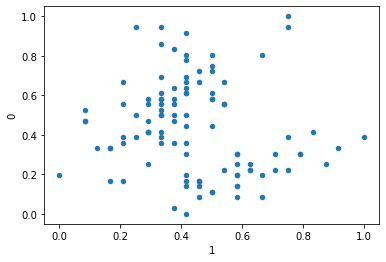

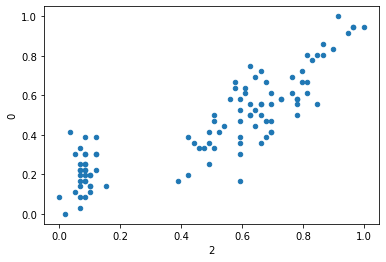

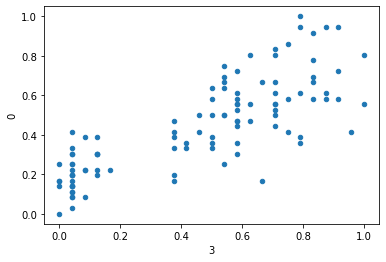

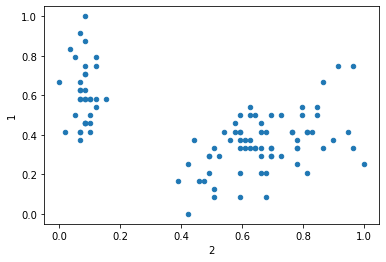

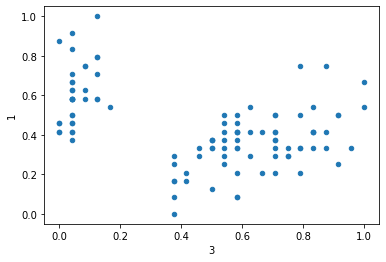

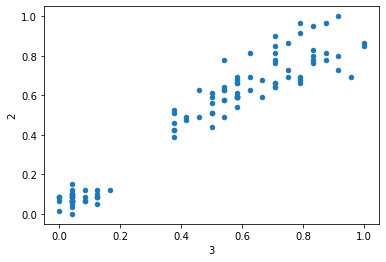

In [34]:
import matplotlib.pyplot as plt

my_plot = df_TN.plot(1, 0, kind="scatter")
plt.show()

my_plot = df_TN.plot(2, 0, kind="scatter")
plt.show()

my_plot = df_TN.plot(3, 0, kind="scatter")
plt.show()

my_plot = df_TN.plot(2, 1, kind="scatter")
plt.show()

my_plot = df_TN.plot(3, 1, kind="scatter")
plt.show()

my_plot = df_TN.plot(3, 2, kind="scatter")
plt.show()

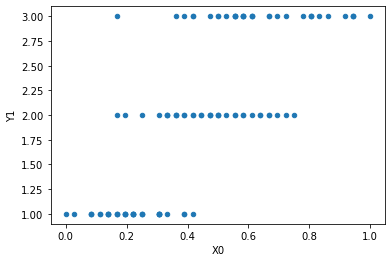

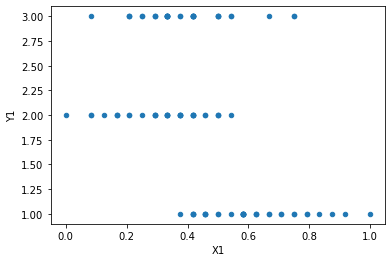

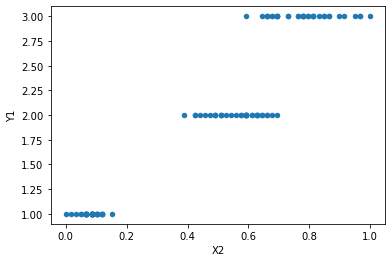

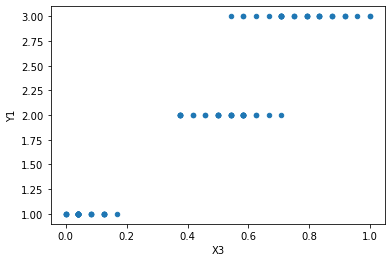

In [35]:
my_plot = df_TN.plot(0, 5, kind="scatter", xlabel= "X0", ylabel = "Y1")
plt.show()
my_plot = df_TN.plot(1, 5, kind="scatter", xlabel= "X1", ylabel = "Y1")
plt.show()
my_plot = df_TN.plot(2, 5, kind="scatter", xlabel= "X2", ylabel = "Y1")
plt.show()
my_plot = df_TN.plot(3, 5, kind="scatter", xlabel= "X3", ylabel = "Y1")
plt.show()

No handles with labels found to put in legend.


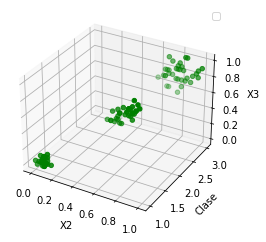

In [48]:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

ax1.scatter(df_TN[2], df_TN[5], df_TN[3], c='g', marker='o')
ax1.set_xlabel('X2')
ax1.set_ylabel('Clase')
ax1.set_zlabel('X3')
ax1.legend()

plt.show()

## Función para medir el error del dataset

In [37]:
def ErrorDataframe(W, Dataf):   
    #Calcula el error promedio del vector de errores para cada fila del dataset
    error =[]

    for i in range(len(Dataf)):
        x1,x2,y =  Dataf.iloc[i, 2], Dataf.iloc[i, 3], Dataf.iloc[i, 4]  # Entradas y valor esperado
        x = np.array([x1,x2,1])  # Arreglo de entradas
        x_w = (W.T * x)         # Multiplicación de entradas por los pesos
        suma = x_w[0] + x_w[1] + x_w[2] # Sumatoria de los productos
        error_i = suma - y                # Cálculo del error
        error.append(error_i)           # Se agrega el error calculado al arreglo de errores de entrenamiento

    error = np.array(error)
    return np.mean(error)


# MONOCAPA

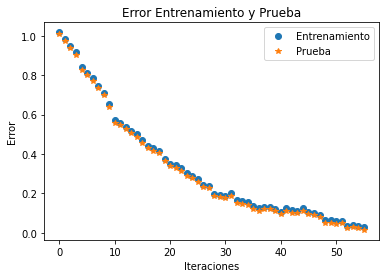

In [38]:
import random
Tolerancia = 0.03 # Valor de tolerancia de error
errorDataset = 100       # Error grande

error_T = []  # Arreglo para almacenar los valores del error para cada elemento de entrenamiento
error_P = []  # Arreglo para almacenar los valores del error para cada elemento de prueba
w0 = [1,1,0]  # Pesos iniciales arbitrarios
w0 = np.array(w0) 
iter = 0      # Contador de iteraciones
u = 0.04      # Paso para modificación de pesos

while (np.abs(errorDataset) > Tolerancia ):  # Cuando el error sea menor a la toleracia o los aciertos continuos son menores a 4
    ########## Entrenamiento #########
    i = random.randint(0, 104)  # Índice aleatorio
    x1,x2,y =  df_TN.iloc[i, 2], df_TN.iloc[i, 3], df_TN.iloc[i, 4]  # Entradas y valor esperado

    x = np.array([x1,x2,1])  # Arreglo de entradas
    x_w = (w0.T * x)         # Multiplicación de entradas por los pesos

    suma = x_w[0] + x_w[1] + x_w[2] # Sumatoria de los productos
    error = suma - y                # Cálculo del error


    ###########    Prueba  ##########
    j = random.randint(0, 29) # Índice aleatorio
    x3,x4,y1 =  df_PN.iloc[j, 2], df_PN.iloc[j, 3], df_PN.iloc[j, 4]  # Entradas y valor esperado

    x_P = np.array([x3,x4,1])   # Arreglo de entradas
    xP_w = (w0.T * x_P)         # Multiplicación de entradas por los pesos

    sumaP = xP_w[0] + xP_w[1] + xP_w[2]  # Sumatoria de los productos
    errorP = sumaP - y1         # Cálculo del error

    w0 = w0 - u*x*error           # Modificación de los pesos

    errorDataset = ErrorDataframe(w0, df_TN)   #Evaluación del dataset de entrenamiento para los pesos modificados
    errorDP = ErrorDataframe(w0, df_PN)        #Evaluación del dataset de prueba para los pesos modificados

    error_T.append(errorDataset)         # Se guarda el valor promedio del error en el dataset para graficarlos
    error_P.append(errorDP)

    iter += 1      # Contador de iteraciones

    # Condiciones para salir del ciclo while en caso de no converger
    if iter > 2000:
        errorDataset = Tolerancia - 0.01

####### Gráfica de resultados ################
x = np.arange(0,len(error_T))    # Vector que representa el número de iteraciones

plt.plot(x, np.abs(error_T), 'o', label = "Entrenamiento")  #Gráfica de arreglo de errores de Entrenamiento
plt.plot(x, np.abs(error_P), '*',label = "Prueba")          #Gráfica de arreglo de errores de Prueba
plt.xlabel("Iteraciones")    # Etiqueta de eje X
plt.ylabel("Error")          # Etiqueta de eje Y
plt.title("Error Entrenamiento y Prueba")   # Título del gráfico
plt.legend()
plt.show()

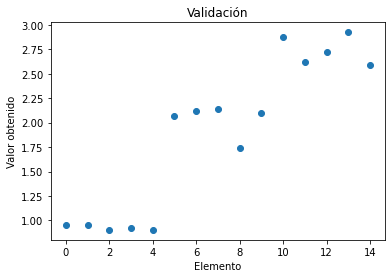

In [39]:
Resultado = [] #Arreglo de resultados obtenidos 
for k in range(15):
    
    ##########   Validación   ###############
    x3,x4 =  df_RN.iloc[k, 2], df_RN.iloc[k, 3] # Entradas
    x_R = np.array([x3,x4,1])                   # Arreglo de entradas
    xR_w = (w0.T * x_R)                         # Multiplicación de entradas por los pesos
    sumaR = xR_w[0] + xR_w[1] + xR_w[2]         # Sumatoria de los productos
    Resultado.append(sumaR)                       # Se agrega el resultado de la sumatoria

####### Gráfica de resultados #########
x = np.arange(0,len(Resultado)) # Vector que representa el número de elementos

plt.plot(x, np.abs(Resultado), 'o') #Gráfica de arreglo de resultado obtenido para cada elemento
plt.xlabel("Elemento")
plt.ylabel("Valor obtenido")
plt.title("Validación")
plt.show()

# Multicapa

## Función para calcular el error en el dataset

In [40]:
## Función de error del dataset
def ErrorDataMulticapa(Wj, Wk, Dataf):
    error = []

    for i in range(len(Dataf)):
        x1,x2,y =  Dataf.iloc[i, 2], Dataf.iloc[i, 3], Dataf.iloc[i, 4]  # Entradas y valor esperado
        x = np.array([x1,x2,1])  # Arreglo de entradas
        x_w0 = (Wj[0:3].T * x)
        x_w1 = (Wj[3:6].T * x)
        A0 = x_w0[0] + x_w0[1] + x_w0[2]
        A1 = x_w1[0] + x_w1[1] + x_w1[2]
        Z1 = sig(A0)
        Z2 = sig(A1)
        h = np.array([Z1,Z2,1]) #Arreglo de entradas para la segunda capa
        ##### Segunda capa  #####
        x_w2 = (Wk.T * h)
        AK = x_w2[0] + x_w2[1] + x_w2[2]

        
        if(AK <= 0.3):     #Rango para tipo 3
            ZK = 3.0 
        elif(AK <= 0.45):  #Rango para tipo 2
            ZK = 2.0
        else:              #Rango para tipo 1
            ZK = 1.0
        

        error_i = ZK - y               # Cálculo del error para la fila i
        error.append(error_i)           # Se agrega el error calculado al arreglo de errores de entrenamiento

    error = np.array(error)
    ERROR = 1 - (np.count_nonzero(error == 0.0)/ len(error))  # Núm. de errores / total de muestras
    return ERROR

In [41]:
#Función sigmoide
def sig(x):
    h = 1 / (1 + np.exp(x))
    return h

Tolerancia = 0.03 # Valor de tolerancia de error
errorTN = 100        # Error grande
errorP = 100       # Error Prueba grande

error_T = []       # Arreglo para almacenar los valores del error para cada elemento de entrenamiento
error_P = []       # Arreglo para almacenar los valores del error para cada elemento de prueba
w0 = np.array([1, 1, 0, 1, 1,0])  # Pesos para primera capa, con bias 
w1 = np.array([1,1, 0])       # Pesos para la segunda capa, con bias

w0_post = np.array([0,0,0,0,0,0]) # Pesos para primera capa siguiente iteración, con bias
w1_post = np.array([0,0,0])       # Pesos para la segunda capa siguiente iteración, con bias

iter = 0                #Contador de iteraciones
t = 0                   #Contador de aciertos continuos

u = 0.004            #Paso para modificación de pesos

while (np.abs(errorTN) > Tolerancia):   # Cuando el error sea menor a la toleracia o los aciertos continuos son menores a 30
    ########### Entrenamiento  #############
    i = random.randint(0, 104)  # Índice aleatorio
    x1,x2,y =  df_TN.iloc[i, 2], df_TN.iloc[i, 3], df_TN.iloc[i, 4]   # Entradas y valor esperado
    x = np.array([x1,x2,1])     # Arreglo de entradas

    #Entradas multiplicadas por los pesos de la primera capa
    x_w0 = (w0[0:3].T * x)
    x_w1 = (w0[3:6].T * x)

    # Suma de la multiplicación de cada entrada de las neuronas
    A0 = x_w0[0] + x_w0[1] + x_w0[2]
    A1 = x_w1[0] + x_w1[1] + x_w1[2]


    # Función de transferencia de cada neurona
    Z1 = sig(A0)
    Z2 = sig(A1)

    h = np.array([Z1,Z2,1]) #Arreglo de entradas para la segunda capa

    ##### Segunda capa  #####
    x_w2 = (w1.T * h)
    AK = x_w2[0] + x_w2[1] + x_w2[2]

    DK = y - AK
    DJ0 = Z1 * (1 - Z1) * (w1[0] * DK)   #Propagación del error
    DJ1 = Z2 * (1 - Z2) * (w1[1] * DK)   #Propagación del error


    # Cálculo de pesos del siguiente paso para la capa  2

    w1_post0 = w1[0] - u * DK * Z1
    w1_post1 = w1[1] - u * DK * Z2
    w1_post = np.array([w1_post0, w1_post1, 0])

    # Cálculo de pesos del siguiente paso para la capa 1
    w0_post0 = w0[0] - u * DJ0 * x1 #Neurona 1
    w0_post1 = w0[1] - u * DJ0 * x2

    w0_post3 = w0[3] - u * DJ1 * x1 #Neurona 2
    w0_post4 = w0[4] - u * DJ1 * x2

    w0_post = np.array([w0_post0, w0_post1, 0,w0_post3, w0_post4, 0])

    errorTN = ErrorDataMulticapa(w0, w1, df_TN)
    error_T.append(errorTN) 
    errorP = ErrorDataMulticapa(w0, w1, df_PN)
    error_P.append(errorP) 

    w0 = w0_post
    w1 = w1_post

    iter += 1        # Contador de iteraciones
    if iter > 2000:   # Condición de iteraciones para salir del ciclo while
        errorTN = 0.03
        t = 200
    elif errorTN == 0:  # Contador de aciertos continuos
        t += 1
    else:
        t = 0        #Reinicio del contador de aciertos continuos


print("Iteraciones: ", iter)
print("Pesos")
print(w0) 
print(w1)

Iteraciones:  306
Pesos
[0.8467874  0.85311374 0.         0.8467874  0.85311374 0.        ]
[0.58582977 0.58582977 0.        ]


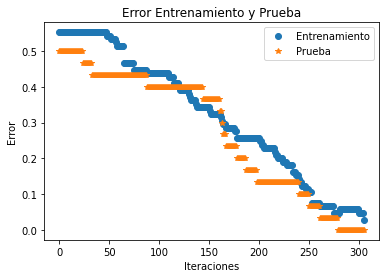

In [42]:
####### Gráfica de resultados ################
x = np.arange(0,len(error_T))    # Vector que representa el número de iteraciones

plt.plot(x, np.abs(error_T), 'o', label = "Entrenamiento")  #Gráfica de arreglo de errores de Entrenamiento
plt.plot(x, np.abs(error_P), '*',label = "Prueba")          #Gráfica de arreglo de errores de Prueba
plt.xlabel("Iteraciones")    # Etiqueta de eje X
plt.ylabel("Error")          # Etiqueta de eje Y
plt.title("Error Entrenamiento y Prueba")   # Título del gráfico
plt.legend()
plt.show()

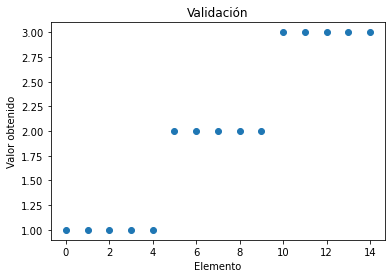

In [43]:
Resultado = [] #Arreglo de resultados obtenidos 
for k in range(15):
    
    ##########   Validación   ###############
    x3,x4 =  df_RN.iloc[k, 2], df_RN.iloc[k, 3] # Entradas
    x = np.array([x3,x4,1])                   # Arreglo de entradas
    x_w0 = (w0[0:3].T * x)
    x_w1 = (w0[3:6].T * x)
    A0 = x_w0[0] + x_w0[1] + x_w0[2]
    A1 = x_w1[0] + x_w1[1] + x_w1[2]
    Z1 = sig(A0)
    Z2 = sig(A1)
    h = np.array([Z1,Z2,1]) #Arreglo de entradas para la segunda capa
    ##### Segunda capa  #####
    x_w2 = (w1.T * h)
    AK = x_w2[0] + x_w2[1] + x_w2[2]

    
    if(AK <= 0.3):
        ZK = 3.0
        #error_i = 0.145 - AK 
    elif(AK <= 0.45):
        ZK = 2.0
        #error_i = 0.3 - AK 
    else:
        ZK = 1.0
        #error_i = 0.6 - AK 
    Resultado.append(ZK)                       # Se agrega el resultado de la sumatoria

####### Gráfica de resultados #########
x = np.arange(0,len(Resultado)) # Vector que representa el número de elementos

plt.plot(x, np.abs(Resultado), 'o') #Gráfica de arreglo de resultado obtenido para cada elemento
plt.xlabel("Elemento")
plt.ylabel("Valor obtenido")
plt.title("Validación")
plt.show()

# Monocapa con 4 variables

In [44]:
def Error4Dataframe(W, Dataf):   
    #Calcula el error promedio del vector de errores para cada fila del dataset
    error =[]

    for i in range(len(Dataf)):
        x0,x1,x2,x3,y =  df_TN.iloc[i, 0], df_TN.iloc[i, 1], df_TN.iloc[i, 2], df_TN.iloc[i, 3], df_TN.iloc[i, 4] # Entradas y valor esperado
        x = np.array([x0,x1,x2,x3,1])                        # Arreglo de entradas
        x_w = (W.T * x)                                     # Multiplicación de entradas por los pesos
        suma = x_w[0] + x_w[1] + x_w[2] + x_w[3] +x_w[4]     # Sumatoria de los productos
        error_i = suma - y                # Cálculo del error
        error.append(error_i)           # Se agrega el error calculado al arreglo de errores de entrenamiento

    error = np.array(error)
    return np.mean(error)

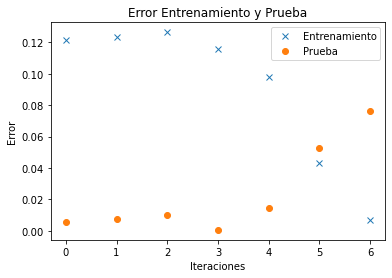

In [45]:
Tolerancia = 0.03  # Valor de tolerancia de error
errorTN = 100        # Error grande

error_T = []       # Arreglo para almacenar los valores del error para cada elemento de entrenamiento
error_P = []       # Arreglo para almacenar los valores del error para cada elemento de prueba
w0 = [1,1,1,1,0]   # Pesos iniciales arbitrarios
w0 = np.array(w0)
iter = 0           # Contador de iteraciones
u = 0.04           # Paso para modificación de pesos
t = 0              # Cantidad de aciertos continuos para mejorar el algoritmo

while (np.abs(errorTN) > Tolerancia):  # Cuando el error sea menor a la toleracia o los aciertos continuos son menores a 4
    ########## Entrenamiento #########
    i = random.randint(0, 104) # Índice aleatorio
    x0,x1,x2,x3,y =  df_TN.iloc[i, 0], df_TN.iloc[i, 1], df_TN.iloc[i, 2], df_TN.iloc[i, 3], df_TN.iloc[i, 4] # Entradas y valor esperado
    x = np.array([x0,x1,x2,x3,1])                        # Arreglo de entradas
    x_w = (w0.T * x)                                     # Multiplicación de entradas por los pesos
    suma = x_w[0] + x_w[1] + x_w[2] + x_w[3] +x_w[4]     # Sumatoria de los productos
    error = suma - y

    w0 = w0 - u * x * error # Actualización de los pesos

    errorTN = Error4Dataframe(w0, df_TN)                   # Cálculo del error
    error_T.append(errorTN)                                # Se agrega el error calculado al arreglo de errores de entrenamiento

     ###########    Prueba  ##########
    errorP = Error4Dataframe(w0, df_PN)                                 # Cálculo del error
    error_P.append(errorP)                               # Se agrega el error calculado al arreglo de errores de prueba

   

    iter += 1     #Contador de iteraciones
    if iter > 500:   #Límite de iteraciones
        error = 0.02
        t = 6
    
####### Gráfica de resultados ################
x = np.arange(0,len(error_T))    # Vector que representa el número de iteraciones

plt.plot(x, np.abs(error_T), 'x', label = "Entrenamiento")  #Gráfica de arreglo de errores de Entrenamiento
plt.plot(x, np.abs(error_P), 'o',label = "Prueba")          #Gráfica de arreglo de errores de Prueba
plt.xlabel("Iteraciones")    # Etiqueta de eje X
plt.ylabel("Error")          # Etiqueta de eje Y
plt.title("Error Entrenamiento y Prueba")   # Título del gráfico
plt.legend()
plt.show()

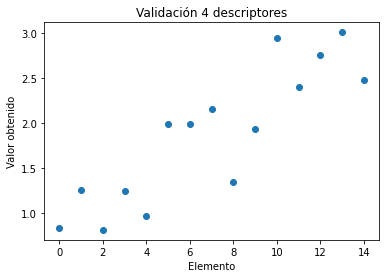

In [46]:
error_R = []
for k in range(15):

    ########## Validación  ############
    x1,x2,x3,x4 =  df_RN.iloc[k, 0], df_RN.iloc[k, 1],df_RN.iloc[k, 2], df_RN.iloc[k, 3]  # Entradas
    x_R = np.array([x1,x2,x3,x4,1])                                                       # Arreglo de entradas
    xR_w = (w0.T * x_R)                                                                   # Multiplicación de entradas por los pesos
    sumaR = xR_w[0] + xR_w[1] + xR_w[2] + xR_w[3] +xR_w[4]                                # Sumatoria de los productos
    error_R.append(sumaR)                                                                 # Se agrega el resultado calculado al arreglo error_R


x = np.arange(0,len(error_R))    # Vector que representa el número de iteraciones
plt.plot(x, np.abs(error_R), 'o')

plt.xlabel("Elemento")
plt.ylabel("Valor obtenido")
plt.title("Validación 4 descriptores")
plt.show()